https://machinelearningmastery.com/xgboost-python-mini-course/

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

--2017-12-31 21:46:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.1’

pima-indians-diabet 100%[===================>]  22.73K   143KB/s    in 0.2s    

2017-12-31 21:46:30 (143 KB/s) - ‘pima-indians-diabetes.data.1’ saved [23279/23279]



In [9]:
ls

pima-indians-diabetes.data  xgboost-tutorial.ipynb


In [35]:
from numpy import loadtxt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# load data
dataset = loadtxt('pima-indians-diabetes.data', delimiter=',')

In [11]:
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [14]:
X.shape, Y.shape

((768, 8), (768,))

In [15]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [16]:
model = XGBClassifier()

In [17]:
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [18]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [20]:
y_pred = model.predict(X_test)

In [24]:
predictions = [round(value) for value in y_pred]

In [29]:
accuracy = accuracy_score(y_test, predictions)

In [30]:
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 77.95%


In [31]:
print(model.feature_importances_)

[ 0.07094595  0.1858108   0.08952703  0.08445946  0.07263514  0.16047297
  0.12837838  0.20777027]


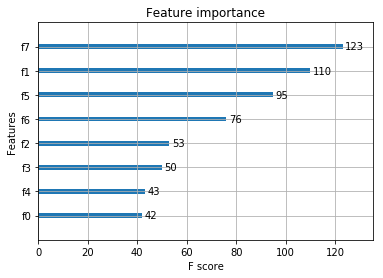

In [37]:
plot_importance(model)

In [38]:
model.learning_rate

0.1

In [40]:
dir(model)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_features_count',
 '_get_param_names',
 '_le',
 'apply',
 'base_score',
 'booster',
 'classes_',
 'colsample_bylevel',
 'colsample_bytree',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',
 'get_params',
 'get_xgb_params',
 'learning_rate',
 'max_delta_step',
 'max_depth',
 'min_child_weight',
 'missing',
 'n_classes_',
 'n_estimators',
 'nthread',
 'objective',
 'predict',
 'predict_proba',
 'reg_alpha',
 'reg_lambda',
 'scale_pos_weight',
 'score',
 'seed',
 'set_params',
 'silent',
 'subsample']

In [41]:
model.n_estimators

100

In [43]:
model.n_classes_

2

In [44]:
model.subsample

1

In [45]:
model.max_depth

3

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [47]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

In [48]:
param_grid

{'max_depth': [2, 4, 6, 8], 'n_estimators': [50, 100, 150, 200]}

In [51]:
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [52]:
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring='neg_log_loss', n_jobs=1, cv=kfold, verbose=1)
result = grid_search.fit(X, Y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   30.3s finished


In [54]:
result.best_score_

-0.4743699228699067

In [55]:
result.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [56]:
means = result.cv_results_['mean_test_score']

In [57]:
means

array([-0.47896612, -0.47436992, -0.47833176, -0.48773776, -0.49183161,
       -0.50878154, -0.53464562, -0.56524915, -0.5141909 , -0.55201343,
       -0.59413648, -0.64052303, -0.54021524, -0.59921839, -0.64791661,
       -0.68629109])

In [58]:
std = result.cv_results_['std_test_score']

In [59]:
std

array([ 0.03729732,  0.04089869,  0.04684618,  0.05188218,  0.05475398,
        0.06035662,  0.07157062,  0.07967163,  0.06392399,  0.07491469,
        0.07858727,  0.08881017,  0.07977898,  0.09148149,  0.10389971,
        0.11529137])

In [60]:
params = result.cv_results_['params']

In [61]:
params

[{'max_depth': 2, 'n_estimators': 50},
 {'max_depth': 2, 'n_estimators': 100},
 {'max_depth': 2, 'n_estimators': 150},
 {'max_depth': 2, 'n_estimators': 200},
 {'max_depth': 4, 'n_estimators': 50},
 {'max_depth': 4, 'n_estimators': 100},
 {'max_depth': 4, 'n_estimators': 150},
 {'max_depth': 4, 'n_estimators': 200},
 {'max_depth': 6, 'n_estimators': 50},
 {'max_depth': 6, 'n_estimators': 100},
 {'max_depth': 6, 'n_estimators': 150},
 {'max_depth': 6, 'n_estimators': 200},
 {'max_depth': 8, 'n_estimators': 50},
 {'max_depth': 8, 'n_estimators': 100},
 {'max_depth': 8, 'n_estimators': 150},
 {'max_depth': 8, 'n_estimators': 200}]

In [63]:
for mean, stdev, param in zip(means, std, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

-0.478966 (0.037297) with: {'max_depth': 2, 'n_estimators': 50}
-0.474370 (0.040899) with: {'max_depth': 2, 'n_estimators': 100}
-0.478332 (0.046846) with: {'max_depth': 2, 'n_estimators': 150}
-0.487738 (0.051882) with: {'max_depth': 2, 'n_estimators': 200}
-0.491832 (0.054754) with: {'max_depth': 4, 'n_estimators': 50}
-0.508782 (0.060357) with: {'max_depth': 4, 'n_estimators': 100}
-0.534646 (0.071571) with: {'max_depth': 4, 'n_estimators': 150}
-0.565249 (0.079672) with: {'max_depth': 4, 'n_estimators': 200}
-0.514191 (0.063924) with: {'max_depth': 6, 'n_estimators': 50}
-0.552013 (0.074915) with: {'max_depth': 6, 'n_estimators': 100}
-0.594136 (0.078587) with: {'max_depth': 6, 'n_estimators': 150}
-0.640523 (0.088810) with: {'max_depth': 6, 'n_estimators': 200}
-0.540215 (0.079779) with: {'max_depth': 8, 'n_estimators': 50}
-0.599218 (0.091481) with: {'max_depth': 8, 'n_estimators': 100}
-0.647917 (0.103900) with: {'max_depth': 8, 'n_estimators': 150}
-0.686291 (0.115291) with: {'